In [1]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('Feature/advanced+statistical_feature.csv')

In [40]:
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]


x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)
#print(y_train)



In [41]:
model1 = ensemble.BaggingClassifier()
model2 = xgb.XGBClassifier()
model3 = linear_model.LogisticRegressionCV()

model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='hard')

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7142857142857143

In [58]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, x, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.62 (+/- 0.08) [Logistic Regression]
Accuracy: 0.54 (+/- 0.10) [Random Forest]
Accuracy: 0.55 (+/- 0.08) [Naive Bayes]


In [59]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.62 (+/- 0.08) [Logistic Regression]
Accuracy: 0.54 (+/- 0.10) [Random Forest]
Accuracy: 0.55 (+/- 0.08) [Naive Bayes]
Accuracy: 0.60 (+/- 0.08) [Ensemble]


ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

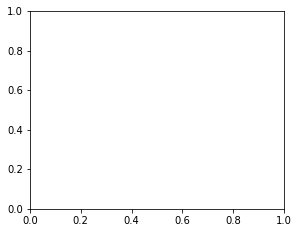

In [60]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(x, y, clf)
    plt.title(lab)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(x, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.607 +/- 0.04 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.607 +/- 0.03 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.607 +/- 0.04 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 20}
0.607 +/- 0.03 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 200}


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Creating a feature-selection-classifier pipeline

sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=4,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=0,
                                 cv=0)

clf1_pipe = Pipeline([('sfs', sfs1),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')


params = {'pipeline__sfs__k_features': [1, 2, 3],
          'pipeline__logreg__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(x, y)



cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.573 +/- 0.04 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 1, 'randomforestclassifier__n_estimators': 20}
0.573 +/- 0.03 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 1, 'randomforestclassifier__n_estimators': 200}
0.573 +/- 0.04 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 2, 'randomforestclassifier__n_estimators': 20}
0.582 +/- 0.03 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 2, 'randomforestclassifier__n_estimators': 200}
0.573 +/- 0.04 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 3, 'randomforestclassifier__n_estimators': 20}
0.573 +/- 0.04 {'pipeline__logreg__C': 1.0, 'pipeline__sfs__k_features': 3, 'randomforestclassifier__n_estimators': 200}
0.564 +/- 0.04 {'pipeline__logreg__C': 100.0, 'pipeline__sfs__k_features': 1, 'randomforestclassifier__n_estimators': 20}
0.564 +/- 0.04 {'pipeline__logreg__C': 100.0, 'pipeline__sfs__k_features': 1, 'randomforestclassifier__n_estimators': 200}
0.573 +/- 0.04 {'pipeline__logre

In [62]:
import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris



clf2 = SVC(probability=True, random_state=4)
clf2.fit(x, y)
eclf = EnsembleVoteClassifier(clfs=[clf2], voting='soft', refit=False)
eclf.fit(x, y)

for svm_class, e_class, svm_prob, e_prob, in zip(clf2.predict(x),
                                                 eclf.predict(x),
                                                 clf2.predict_proba(x),
                                                 eclf.predict_proba(x)):
    if svm_class != e_class:
        print('============')
        print('Probas from SVM            :', svm_prob)
        print('Class from SVM             :', svm_class)
        print('Probas from SVM in Ensemble:', e_prob)
        print('Class from SVM in Ensemble :', e_class)
        print('============')

Probas from SVM            : [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.00403871 0.32317541 0.36555215 0.30723373]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00403871 0.32317541 0.36555215 0.30723373]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.00404585 0.32317333 0.36554963 0.30723119]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00404585 0.323

Probas from SVM            : [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM             : 4
Probas from SVM in Ensemble: [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM             : 4
Probas from SVM in Ensemble: [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM             : 4
Probas from SVM in Ensemble: [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM             : 4
Probas from SVM in Ensemble: [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM in Ensemble : 3
Probas from SVM            : [0.32116698 0.3174597  0.35743747 0.00393584]
Class from SVM             : 4
Probas from SVM in Ensemble: [0.32116698 0.317

In [63]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2])

eclf.fit(x, y)

EnsembleVoteClassifier(clfs=[Pipeline(memory=None,
                                      steps=[('columnselector',
                                              ColumnSelector(cols=(0, 2),
                                                             drop_axis=False)),
                                             ('logisticregression',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=100,
                                                                 multi_class='warn',
               

In [70]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

In [33]:
data = pd.read_csv('Feature/advanced+statistical_feature.csv')

In [34]:
df_x = data.drop("Level", axis=1)
df_y = data["Level"]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [67]:
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rf.score(x_test,y_test)

0.75

In [79]:
#Gradient boosting
gb = ensemble.GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
gb.score(x_test,y_test)

0.5625

In [81]:
#Bagging 

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [82]:
bg.score(x_test,y_test)

0.6875

In [83]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [85]:
adb.score(x_test,y_test)

0.6875

In [86]:
#extra trees
et=ensemble.ExtraTreesClassifier()
et.fit(x_train,y_train)

c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [87]:
et.score(x_test,y_test)

0.6875

In [88]:
# Voting Classifier - Multiple Model Ensemble 

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [89]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [90]:
evc.fit(x_train,y_train)

c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                                        

In [91]:
evc.score(x_test, y_test)

0.625